In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mart = pd.read_excel('supermarket_sales.xlsx')
mart.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


In [3]:
mart.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:

mart.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
#handle missing values
mart.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
mart['Gender'].describe()

count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object

In [7]:
#Return a Series containing counts of unique values.
mart['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [8]:
""""
    This is the dictionary comprehension part. For each column (col), it generates a key-value pair:
    The key is the column name (col).
    The value is the result of mart[col].value_counts(), which is a Series showing the count of unique values in that column.
"""
unique_counts = {col:mart[col].value_counts() for col in mart.columns}
unique_counts

{'Invoice ID': Invoice ID
 849-09-3807    1
 692-92-5582    1
 351-62-0822    1
 529-56-3974    1
 299-46-1805    1
               ..
 640-49-2076    1
 777-82-7220    1
 280-35-5823    1
 354-25-5821    1
 132-32-9879    1
 Name: count, Length: 1000, dtype: int64,
 'Branch': Branch
 A    340
 B    332
 C    328
 Name: count, dtype: int64,
 'City': City
 Yangon       340
 Mandalay     332
 Naypyitaw    328
 Name: count, dtype: int64,
 'Customer type': Customer type
 Member    501
 Normal    499
 Name: count, dtype: int64,
 'Gender': Gender
 Female    501
 Male      499
 Name: count, dtype: int64,
 'Product line': Product line
 Fashion_accessories       178
 Food_and_beverages        174
 Electronic_accessories    170
 Sports_and_travel         166
 Home_and_lifestyle        160
 Health_and_beauty         152
 Name: count, dtype: int64,
 'Unit price': Unit price
 83.77    3
 77.68    2
 78.38    2
 73.05    2
 22.01    2
         ..
 91.40    1
 15.43    1
 85.98    1
 55.73    1
 97.38

In [9]:
mart.groupby('Gender')['Branch'].value_counts()

Gender  Branch
Female  C         178
        B         162
        A         161
Male    A         179
        B         170
        C         150
Name: count, dtype: int64

In [10]:
mart.shape

(1000, 17)

In [11]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
duplicated = mart.duplicated().sum()
print (f'There are {duplicated} records in this dataset')

There are 0 records in this dataset


**COUNTPLOT**

Create a basic COUNTPLOT to get number of transaction for each of the product line and change the figure size

In [13]:
describe = mart['Product line'].describe()
print(describe)
print('-----------------------------------')
unique_counts = mart['Product line'].value_counts()
print(unique_counts)

count                    1000
unique                      6
top       Fashion_accessories
freq                      178
Name: Product line, dtype: object
-----------------------------------
Product line
Fashion_accessories       178
Food_and_beverages        174
Electronic_accessories    170
Sports_and_travel         166
Home_and_lifestyle        160
Health_and_beauty         152
Name: count, dtype: int64


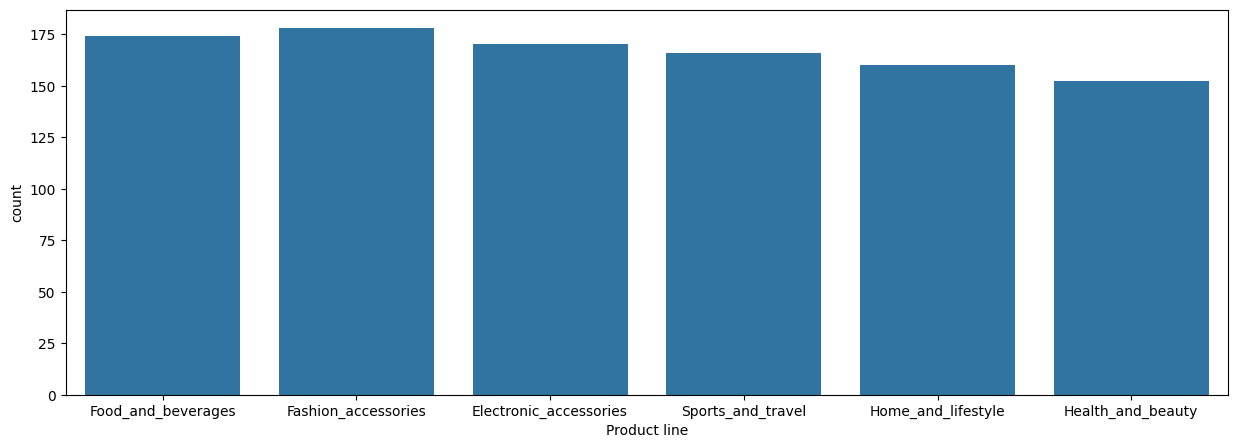

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=mart, x='Product line')
plt.show()

Make it horizontal bar plot

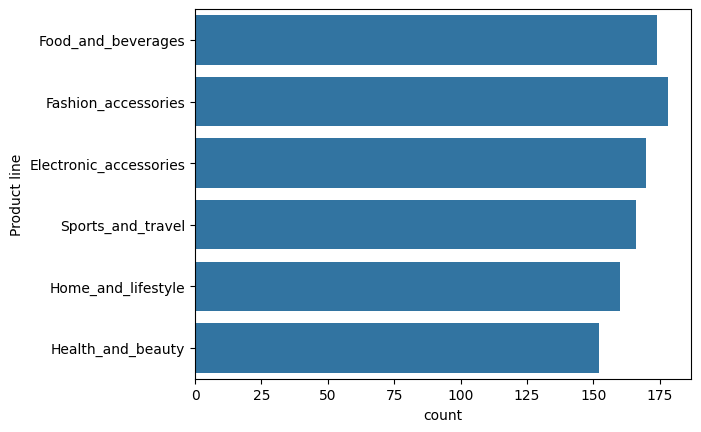

In [15]:
# plt.figure(figsize=(15,5))
sns.countplot(data=mart, y='Product line')
plt.show()

Add hue

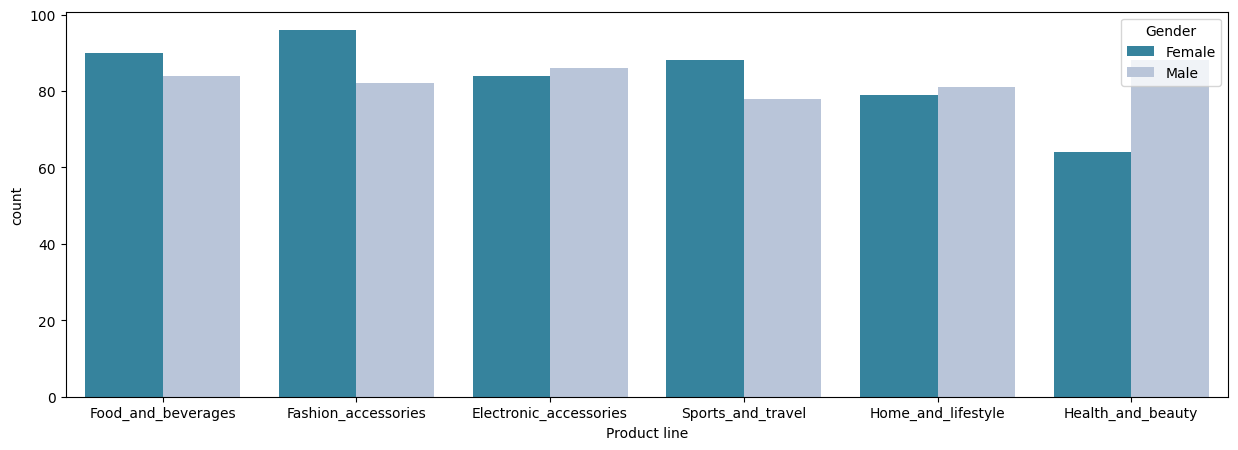

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=mart,
    x='Product line',
    hue='Gender',
    palette='PuBuGn_r')
plt.show()

**Bar Plots**

In [17]:
sns.get_dataset_names()
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [18]:
mart.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
180,198-66-9832,B,Mandalay,Member,Female,Fashion_accessories,72.04,2,7.2040,151.2840,2019-04-02 00:00:00,19:38:00,Cash,144.08,4.761905,7.2040,9.5
973,459-45-2396,A,Yangon,Member,Female,Food_and_beverages,99.60,3,14.9400,313.7400,2/25/2019,18:45:00,Cash,298.80,4.761905,14.9400,5.8
728,802-43-8934,A,Yangon,Normal,Male,Home_and_lifestyle,18.28,1,0.9140,19.1940,3/22/2019,15:05:00,Credit card,18.28,4.761905,0.9140,8.3
469,110-05-6330,C,Naypyitaw,Normal,Female,Food_and_beverages,39.43,6,11.8290,248.4090,3/25/2019,20:18:00,Credit card,236.58,4.761905,11.8290,9.4
969,865-41-9075,A,Yangon,Normal,Male,Food_and_beverages,11.53,7,4.0355,84.7455,1/28/2019,17:35:00,Cash,80.71,4.761905,4.0355,8.1


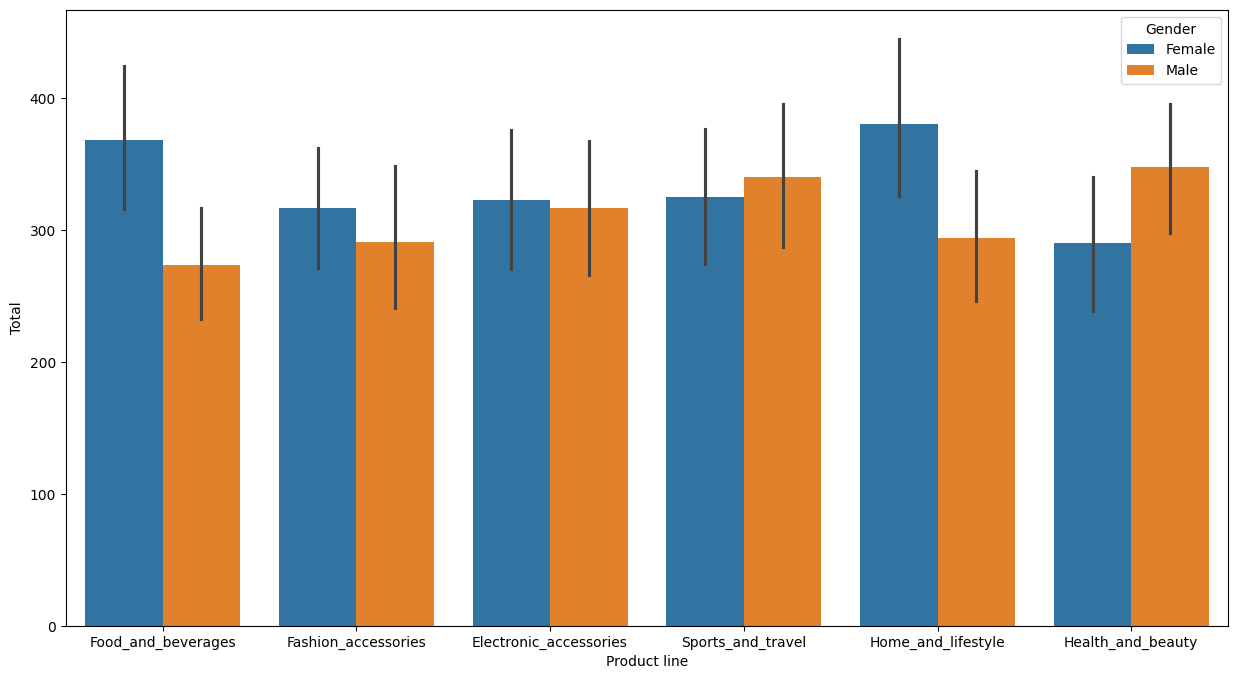

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(data=mart, x='Product line', y='Total', hue='Gender')
plt.show()

Plot the bar in a given order

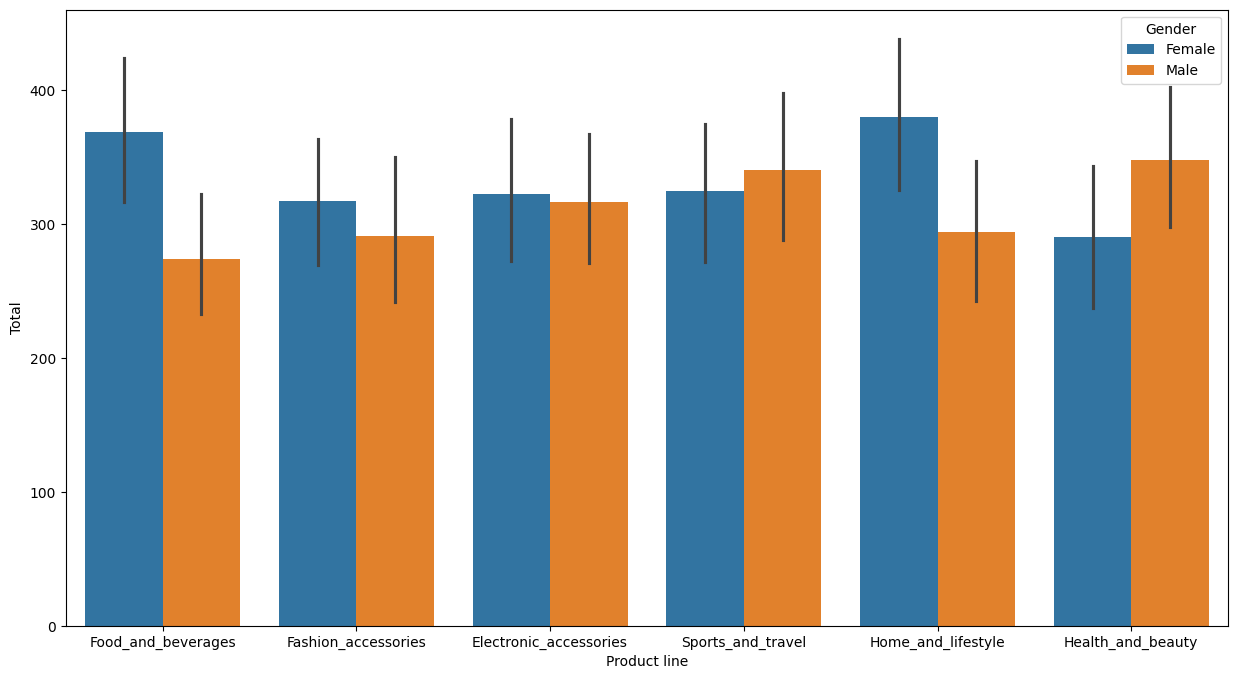

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(data=mart, x='Product line', y='Total', hue='Gender')
plt.show()

In [21]:
sorted_values = mart['Product line'].sort_values(ascending=True)
sorted_values

499    Electronic_accessories
609    Electronic_accessories
608    Electronic_accessories
602    Electronic_accessories
596    Electronic_accessories
                ...          
635         Sports_and_travel
146         Sports_and_travel
148         Sports_and_travel
867         Sports_and_travel
290         Sports_and_travel
Name: Product line, Length: 1000, dtype: object

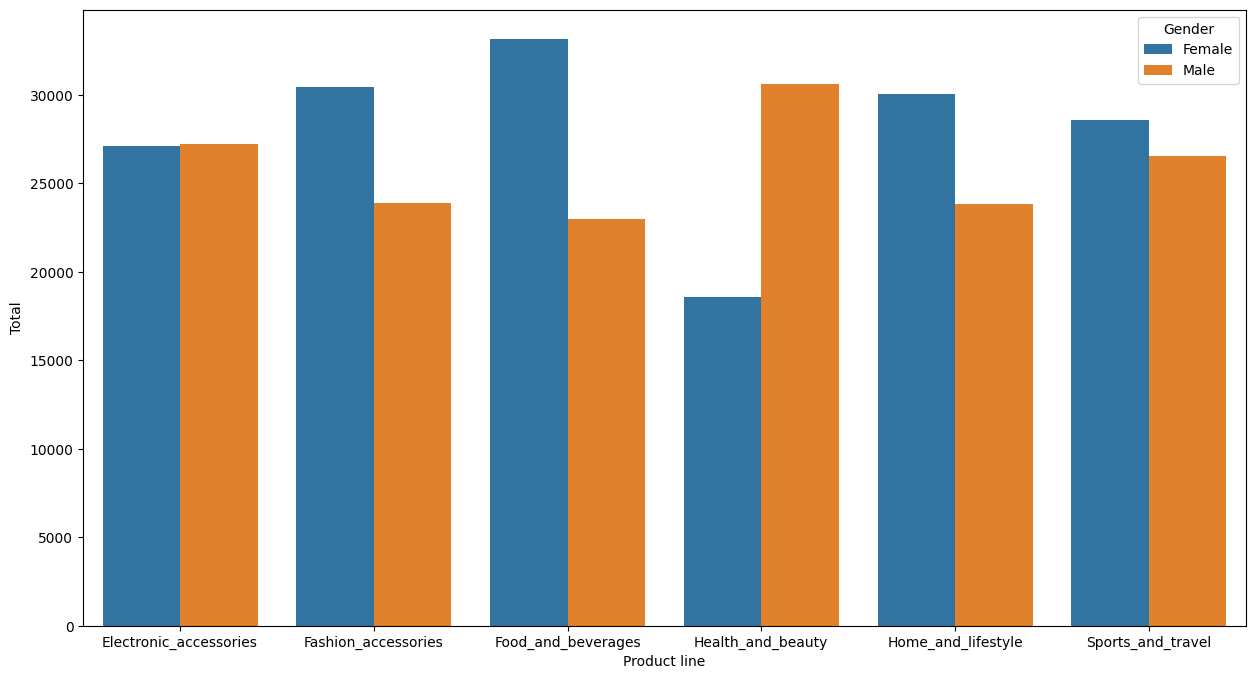

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(data=mart, x='Product line', y='Total', hue='Gender', order=sorted_values, errorbar=None, estimator=sum)
plt.show()

**Box Plot**

Provides a summary of supplied data which includes mean, median, maximum, minimum, 1st quartile, 3rd quartile and outlyers

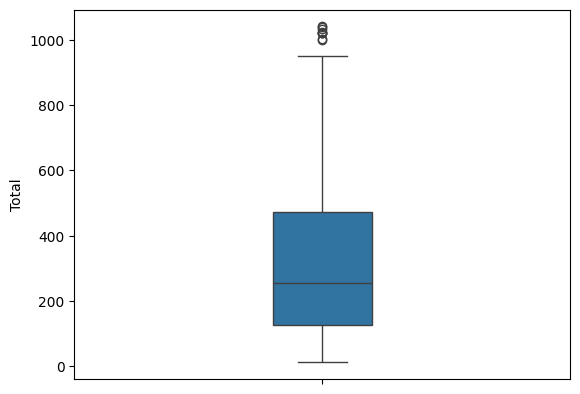

In [23]:
#plt.figure(figsize=(3,8))
sns.boxplot(data=mart, y='Total', width=0.2)
plt.show()


Create a basic BOX plot on one numeric variable by TWO categorical variable using hue attribute

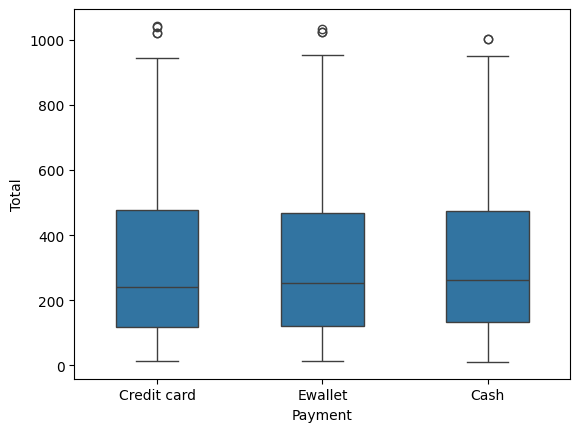

In [24]:
sns.boxplot(data=mart, x='Payment', y='Total', width=0.5)
plt.show()

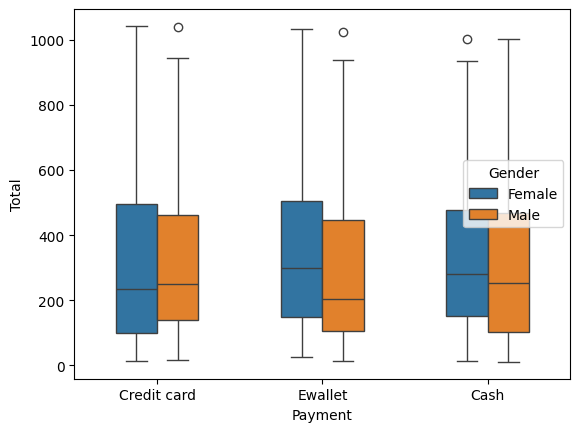

In [25]:
sns.boxplot(
    data=mart,
    x='Payment',
    y='Total',
    hue='Gender',
    width=0.5
    )
plt.show()

Create box plot for each of the numerical variable in the dataframe

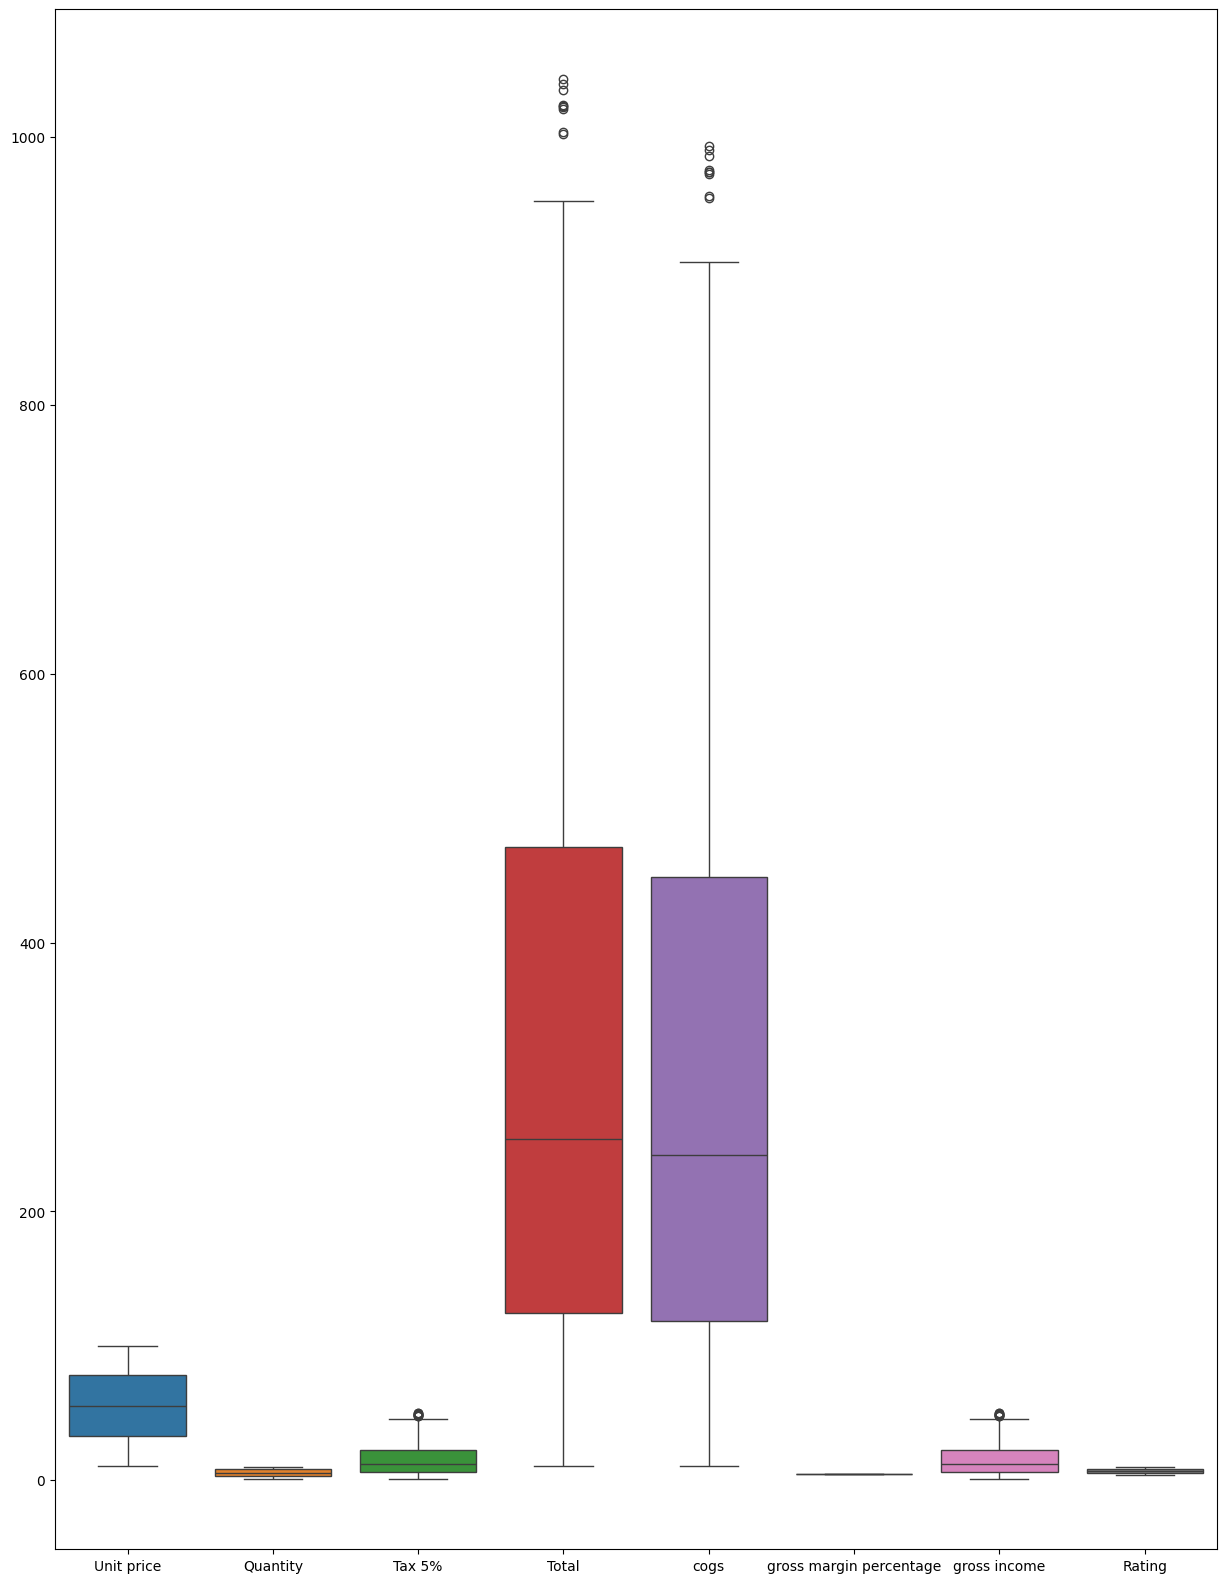

In [26]:
plt.figure(figsize=(15,20))
sns.boxplot(data=mart)
plt.show()